In [14]:
%load_ext autoreload
%autoreload 2
import numpy as np
from sympy.logic import SOPform, boolalg
from sympy import symbols, srepr, Not
import re
from tqdm import tqdm
import matplotlib.pyplot as plt
from BoolFuncModule.BoolFunc import BoolFunc
import BoolFuncModule.ParameterAssignment as PA

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
testFunc = BoolFunc(parameterType=3)

print(testFunc.get_parameters())
print(testFunc.get_SOP())
print(testFunc.get_D())

(array([[ 1, -1, -1],
       [ 0,  0,  0],
       [ 0,  0,  1],
       [ 0,  0,  1]]), array([[0],
       [0],
       [0],
       [0]]), array([[-1, -1,  0,  0]]), 1)
1 | 2 | ~0
4


In [25]:
sampleSize = 1000
parameterType = 3

frequencyDict = {}
for i in tqdm(range(sampleSize)):
    function = BoolFunc(n=3, parameterType=parameterType)
    isInDict = False
    SOP = function.get_SOP()
    if SOP is True or SOP is False or not isinstance(SOP, boolalg.Or):      # accounts for SOPs with just one literal for which equals() function seems to fail.
        for key in frequencyDict:
            if function.get_SOP() == key:
                frequencyDict[key][0] += 1
                isInDict = True
                break
    else:
        for key in frequencyDict:
            if function.get_SOP().equals(key):
                frequencyDict[key][0] += 1
                isInDict = True
                break
    if isInDict is False:
        frequencyDict[SOP] = [1, function.get_D()]
        



100%|██████████| 10000/10000 [25:07<00:00,  6.63it/s] 


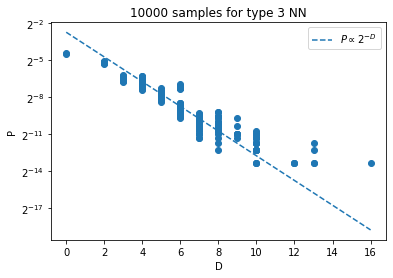

In [26]:
P = [val[0]/sampleSize for key, val in frequencyDict.items()]
D = [val[1] for key, val in frequencyDict.items()]

x = np.linspace(0, max(D), 100)
y = 0.15*2**(-x)

plt.scatter(D, P)
plt.plot(x,y, linestyle='--', label='$P\propto2^{-D}$')
plt.yscale('log', base=2)
plt.title(f'{sampleSize} samples for type {parameterType} NN')
plt.xlabel('D')
plt.ylabel('P')
plt.legend()
plt.savefig(f'type{parameterType}/P_vs_D_samples{sampleSize}.png')
plt.show()

In [16]:
min(D)

0